<h1>Python-Data cleaning and preprocessing</h1>

<b>1</b>

In [23]:

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

<b>2</b>

import pandas as pd: pandas is a data manipulation library in Python. It offers data structures for efficiently storing and processing large datasets, and functions for manipulating them.

import numpy as np: numpy is a numerical computation library in Python. It provides support for large, multi-dimensional arrays and matrices, as well as a wide range of mathematical operations.

%matplotlib inline: This is a magic command used in Jupyter notebooks that enables the plotting of graphs and charts directly in the notebook itself, rather than in a separate window.

import matplotlib.pyplot as plt: matplotlib is a visualization library in Python. pyplot is a module within matplotlib that provides a range of functions for creating different types of charts and graphs.

import matplotlib.image as mpimg: This module in matplotlib provides support for working with image files, such as loading and displaying them.

from sklearn.decomposition import PCA: This module in scikit-learn (sklearn) provides an implementation of Principal Component Analysis (PCA), which is a technique for reducing the dimensionality of large datasets while retaining as much of their variation as possible.

<b>3</b>

In [24]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformityof Cell Shape','Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'BlandChromatin','Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Sample code'],axis=1)

<b>4</b>

The dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

The Iris dataset is a classic example of a machine learning dataset and is used in many machine learning tutorials and courses. It is also a popular dataset for testing new machine learning algorithms.

The Iris dataset is available in many machine learning libraries, including scikit-learn.

<b>5</b>

In [25]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformityof Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,BlandChromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


The first line of output prints the number of instances in the dataset, which is equivalent to the number of rows. The %d in the string is a placeholder for an integer value, which is filled in using the (data.shape[0]) expression. This gives us the number of rows in the dataset, which is the number of instances.

The second line of output prints the number of attributes in the dataset, which is equivalent to the number of columns. The %d in the string is a placeholder for an integer value, which is filled in using the (data.shape[1]) expression. This gives us the number of columns in the dataset, which is the number of attributes.

The data.head() method call prints the first 5 rows of the dataset, along with their column names. This can help us get a sense of what the dataset looks like and how the different attributes are distributed.

<b>6</b>

In [26]:
data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))


Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformityof Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	BlandChromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


The code output shows that all columns have 0 missing values , except the Bare Nuclei column that has 16 missing values.

<b>7</b>

In [27]:
data2 = data['Bare Nuclei']
print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())
print('\nAfter replacing missing values:')
print(data2[20:25])
print('Number of rows in original data = %d' % (data.shape[0]))
data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))


Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20     10
21      7
22      1
23    1.0
24      1
Name: Bare Nuclei, dtype: object
Number of rows in original data = 699
Number of rows after discarding missing values = 683


the code replaces missing values in the 'Bare Nuclei' column with the median value of the column using the .fillna() method. This is a common technique for dealing with missing values, as it helps to avoid biasing the data by filling in missing values with a specific value such as 0 or the mean.
The final line of output prints the number of rows in the dataset after discarding rows with missing values. This is done by calling the .dropna() method, which results on droping 16 lines (the ones with missing values)

<b>8</b>

<AxesSubplot:>

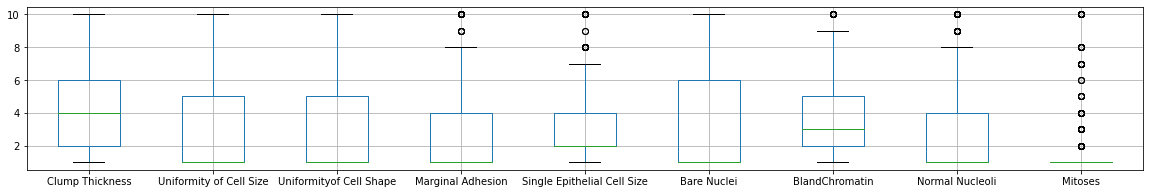

In [28]:
data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

The output shows a box plot describing the distribution of the columns of the dataset , we can see that 5 columns have outliers which we should eal with in our preprocessing

<b>9</b>

In [29]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]


,Clump Thickness,Uniformity of Cell Size,Uniformityof Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,BlandChromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


The code standardizes the data2 DataFrame by subtracting the mean from each value and dividing by the standard deviation. 

<b>10</b>

In [30]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))
Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))


Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


 the code creates a new DataFrame Z2 that includes only the rows where all values are within 3 standard deviations of the mean. This is done using only the rows that satisfy two conditions:

(Z > -3).sum(axis=1)==9 counts the number of values in each row of Z that are greater than -3 (i.e., the number of values that are within 3 standard deviations of the mean), and selects only the rows where all 9 values meet this criterion.
(Z <= 3).sum(axis=1)==9 counts the number of values in each row of Z that are less than or equal to 3 (i.e., the number of values that are within 3 standard deviations of the mean), and selects only the rows where all 9 values meet this criterion.

The resulting DataFrame Z2 contains only the rows that have no outliers  and has 37 fewer rows than the original DataFrame Z

<b>11</b>

In [31]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of duplicate rows = 236
Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


the code shows that the dataset has 236 duplicate values , and uses the drop_duplicates method to get rid of them.

<b>12</b>

Text(0.5, 1.0, 'Daily Precipitation (variance = 0.0530)')

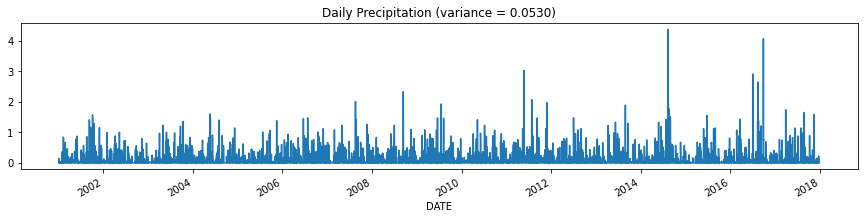

In [32]:
daily = pd.read_csv('DTW_prec.csv', header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

his code reads in and visualizes daily precipitation data and includes a descriptive title with the variance(0.0530) of the data. the line plot shows the distribution of the data from 2002 to 2018 , where the precipitations clearly peaked some day in 2015 .

<b>13</b>

Text(0.5, 1.0, 'Annual Precipitation (variance = 23.6997)')

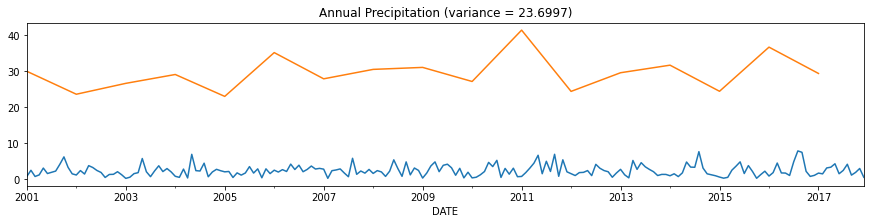

In [33]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

The code outputs a line plot combining the Monthly and annual precipitation, the monthly plot is the one at the bottom , the annual data has as expected higher variance .

<b>14</b>

In [34]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformityof Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,BlandChromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [35]:
sample = data.sample(n=3)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformityof Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,BlandChromatin,Normal Nucleoli,Mitoses,Class
159,9,9,10,3,6,10,7,10,6,4
418,5,2,2,2,2,2,3,2,2,2
594,4,8,6,3,4,10,7,1,1,4


In [36]:

sample = data.sample(frac=0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformityof Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,BlandChromatin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1,1,1,1,2
417,1,1,1,1,2,1,2,1,1,2
606,4,1,1,2,2,1,1,1,1,2
349,4,2,3,5,3,8,7,6,1,4
134,3,1,1,1,3,1,2,1,1,2
502,4,1,1,2,2,1,2,1,1,2
117,4,5,5,10,4,10,7,5,8,4


In [37]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformityof Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,BlandChromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


As we can see in the output, the data.sample() function can be used to return a random sample of the DataFrame. The frac argument can be used to specify the fraction of the DataFrame to return. The replace argument can be used to specify whether or not to replace the samples. The random_state argument can be used to specify the random seed , that will preserve the sample if we rerun the code.

<b>15</b>

5     130
3     108
6      34
4      80
8      46
1     145
2      50
7      23
10     69
9      14
Name: Clump Thickness, dtype: int64

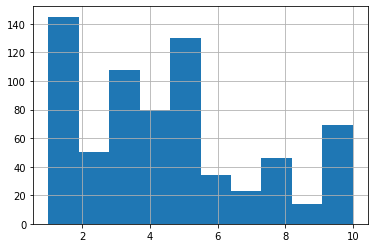

In [38]:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)



In [39]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: Clump Thickness, dtype: int64

In [40]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: Clump Thickness, dtype: int64

The code creates a histogram of the Clump Thickness column of the DataFrame, with 10 bins , it shows the distribution of the values of the column. Then returns the number of occurrences of each value in the Clump Thickness column. 

The bins = pd.cut(data['Clump Thickness'],4) function creates a new column called bins that contains the values of the Clump Thickness column, binned into 4 groups.

The bins = pd.qcut(data['Clump Thickness'],4) function creates a new column called bins that contains the values of the Clump Thickness column, binned into 4 quantile based groups.

<b>16</b>

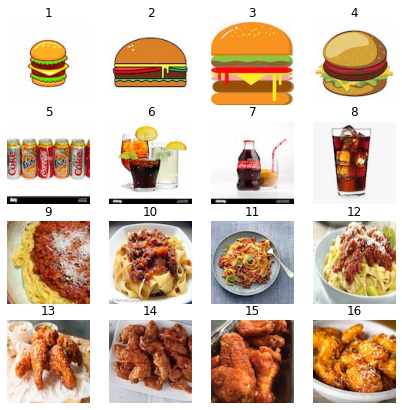

In [41]:
numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))
for i in range(1,numImages+1):
 filename = 'pics/Picture'+str(i)+'.jpg'
 img = mpimg.imread(filename)
 ax = fig.add_subplot(4,4,i)
 plt.imshow(img)
 plt.axis('off')
 ax.set_title(str(i))
 imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[
2])

The code shows all the pictures contained in the pics directory

<b>17</b>

In [42]:
numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)
projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','drink','drink','drink','drink'
,
 'pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken'
, 'chicken']
projected

,pc1,pc2,food
1,-12415.290119,-3696.790280,burger
2,-4677.663686,-6650.536067,burger
3,6739.535271,1310.231742,burger
4,-3579.267148,-6631.905109,burger
5,-3677.865969,10491.130636,drink
6,-10136.667311,6936.604398,drink
7,-12056.329278,7320.743483,drink
8,-8838.995821,-4526.334078,drink
9,5326.560522,1252.209005,pasta
10,2808.055345,-5328.632199,pasta



The code you performs Principal Component Analysis (PCA) on imgData and creates a DataFrame called projected with the projected data on the PCA axes. 

<b>18</b>

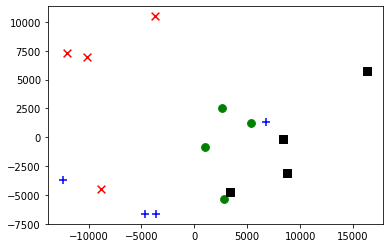

In [43]:
colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}
for foodType in markerTypes:
 d = projected[projected['food']==foodType]
 plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])
 

The code assigns colors and marker types to different food categories based on their labels. Then, it iterates over each food type in markerTypes and plots a scatter plot for each category using the corresponding color and marker on the PCA axes